https://www.kaggle.com/dhainjeamita/resume-classification

https://medium.com/big-apps-tech/nlp-natural-language-processing-machine-learning-classification-2-d486c257eaa6

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import time

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


from gensim.models import Word2Vec
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import nltk

!pip install -q wordcloud
import nltk
nltk.download("punkt")
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Import data

In [3]:
df = pd.read_csv("drive/MyDrive/brief_NLTK/DataSet.csv")
print(df.shape)
df.head()

(962, 2)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Visualisation data

<function matplotlib.pyplot.show>

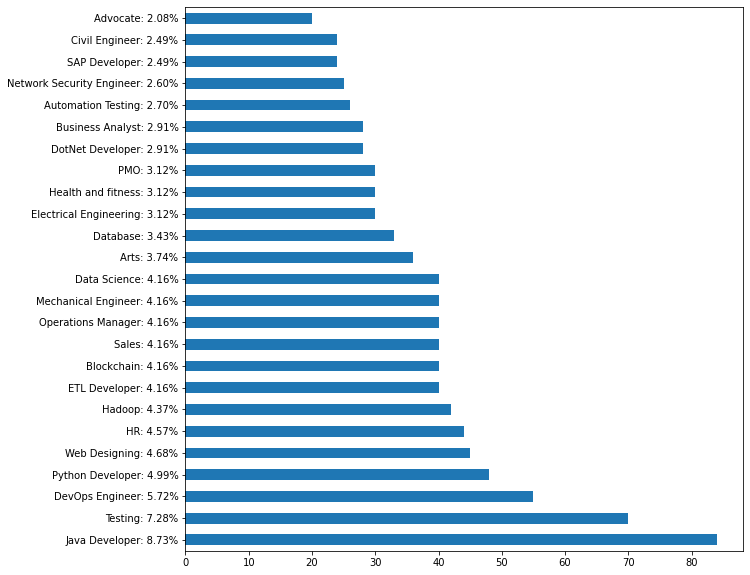

In [4]:
data_count =df.Category.value_counts()
new_index = [k+ ": %.2f%%" %(v*100/df.shape[0]) for k,v in data_count.iteritems()]
data_count.index = new_index
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
data_count.plot.barh(logx = False)
plt.show

# Clean text

In [5]:
Liste = list()
def traitement_nltk(df_line):
    phrases = tokenizer.tokenize(df_line)
    return phrases

def traitement_BS(string):
    soup = BeautifulSoup(string)
    string = (soup.get_text())
    string = re.sub("\d+",'', string)
    string = string.lower()
    string = string.split()
    return string

def traitement(df_line):
    phrases = traitement_nltk(df_line)
    for i in phrases:
        a = traitement_BS(i)
        return a

In [6]:
df["clean_review"] = df["Resume"].apply(lambda x: traitement(x))
df

,Category,Resume,clean_review
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skills, *, programming, languages:, python, (..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[education, details, may, to, may, b.e, uit-rg..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[areas, of, interest, deep, learning,, control..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skills, â¢, r, â¢, python, â¢, sap, hana, ..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[education, details, mca, ymcaust,, faridabad,..."
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,"[computer, skills:, â¢, proficient, in, ms, o..."
958,Testing,â Willingness to accept the challenges. â ...,"[â, willingness, to, accept, the, challenges.]"
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","[personal, skills, â¢, quick, learner,, â¢, ..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"[computer, skills, &, software, knowledge, ms-..."


# Create model

In [7]:
model = Word2Vec(df["clean_review"], sg=1, hs=1, size=300, window=10, min_count=40, workers=5)

# Split data

In [8]:
df["clean_review"] = df["clean_review"].apply(lambda x : " ".join(x))

In [9]:
requiredTarget = df['Category'].values
requiredText = df['clean_review'].values


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
predictions = clf.predict(X_test)

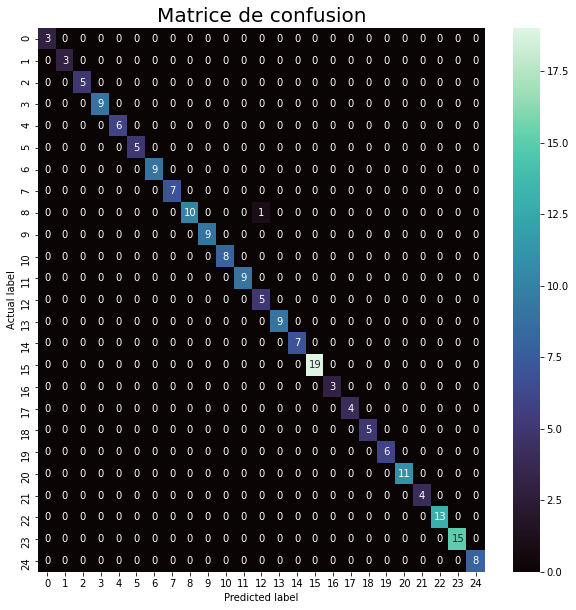

In [13]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [14]:
d = dict()
for i in df["Category"].unique():
  df_order = df[df["Category"] == i]
  d[i] = df_order["Resume"].to_string()
for i in d:
  wcobscene = WordCloud(max_font_size=60).generate(d[i])
  plt.figure(figsize=(12,6))
  plt.imshow(wcobscene, interpolation='bilinear')
  plt.axis("off")
  plt.title(i)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
accuracy_score(y_test, predictions)

0.9948186528497409

# Sac de centroids

In [16]:
start = time.time() # Start time  23 minutes

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster

num_clusters = model.wv.vectors.shape[0] / 5
num_clusters


# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = int(num_clusters) )
idx = kmeans_clustering.fit_predict(model.wv.vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print ("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  0.5423479080200195 seconds.


In [17]:
word_centroid_map = dict(zip( model.wv.index2word, idx ))
word_centroid_map.values()

dict_values([4, 2, 0, 4, 4, 0, 0, 0, 9, 0, 8, 0, 9, 9, 22, 22, 22, 8, 0, 10, 24, 9, 9, 24, 15, 4, 19, 9, 0, 24, 16, 19, 30, 32, 26, 25, 1, 2, 10, 14, 20, 19, 32, 0, 9, 2, 21, 9, 9, 5, 9, 2, 3, 26, 2, 21, 14, 3, 9, 20, 9, 15, 9, 2, 21, 12, 21, 32, 7, 9, 10, 5, 9, 8, 18, 5, 19, 10, 17, 30, 6, 2, 5, 2, 7, 5, 25, 9, 12, 2, 29, 3, 6, 19, 20, 28, 19, 24, 32, 18, 9, 3, 1, 1, 5, 14, 13, 14, 3, 27, 32, 8, 3, 12, 13, 21, 0, 8, 1, 6, 25, 22, 20, 23, 19, 14, 32, 15, 1, 24, 21, 19, 23, 18, 6, 12, 1, 5, 17, 26, 32, 14, 7, 4, 10, 10, 9, 15, 31, 10, 31, 17, 2, 31, 19, 24, 24, 8, 11, 24, 3, 27, 24, 6, 7])

In [18]:
# For the first 10 clusters
for cluster in range(0,10):
    #
    # Print the cluster number  
    print ("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    values=list(word_centroid_map.values())
    keys=list(word_centroid_map.keys())
    for i in range(0,len(word_centroid_map.values())):
        if( values[i] == cluster ):
            words.append(keys[i])
    print (words)


Cluster 0
['details', 'and', 'of', 'to', 'company', 'skill', 'description', 'developer', 'business', 'hr']

Cluster 1
['ms', '*', 'office', 'basic', 'power', 'electrical']

Cluster 2
['â\x80¢', 'skills:', 'java', 'languages:', 'it', 'c,', 'tools:', 'programming', 'core', 'reports']

Cluster 3
['on', 'working', 'team', 'ability', 'work', 'from', 'sales']

Cluster 4
['-', 'exprience', 'months', 'monthscompany', 'solution']

Cluster 5
['sql', ',', 'database', 'microsoft', 'oracle', 'server', 'other']

Cluster 6
['testing', 'test', 'application', 'environment', 'tracking']

Cluster 7
['school', 'secondary', 'senior', 'blockchain']

Cluster 8
['&', 'skills', 'knowledge', 'communication', 'key', 'control']

Cluster 9
['january', 'maharashtra', 'education', 'engineering', 'university', 'computer', 'technology', 'college', 'june', 'mumbai,', 'diploma', 'bachelor', 'science', 'information', 'may', 'mumbai', 'be', 'b.e']


In [19]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [20]:
df["matrix"] = df["clean_review"].apply(lambda x: create_bag_of_centroids( x, word_centroid_map )) 
df

,Category,Resume,clean_review,matrix
0,Data Science,Skills * Programming Languages: Python (pandas...,skills * programming languages: python (pandas...,"[0.0, 1.0, 0.0, 0.0, 1.0, 7.0, 0.0, 0.0, 0.0, ..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b.e uit-rgpv data...,"[0.0, 0.0, 0.0, 0.0, 18.0, 1.0, 0.0, 0.0, 0.0,..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","areas of interest deep learning, control syste...","[0.0, 0.0, 0.0, 0.0, 9.0, 23.0, 0.0, 0.0, 0.0,..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,"[0.0, 0.0, 0.0, 0.0, 21.0, 2.0, 0.0, 0.0, 1.0,..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","education details mca ymcaust, faridabad, hary...","[0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills: â¢ proficient in ms office (...,"[0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 3.0, ..."
958,Testing,â Willingness to accept the challenges. â ...,â willingness to accept the challenges.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","personal skills â¢ quick learner, â¢ eagerne...","[0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, ..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills & software knowledge ms-power ...,"[0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 0.0, 0.0, 1.0,..."


In [21]:
X = []
df['matrix'].map(lambda x: X.append(x))
X = np.array(X)

y = df["Category"]


X.shape, y.shape

((962, 33), (962,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((769, 33), (769,))

In [23]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

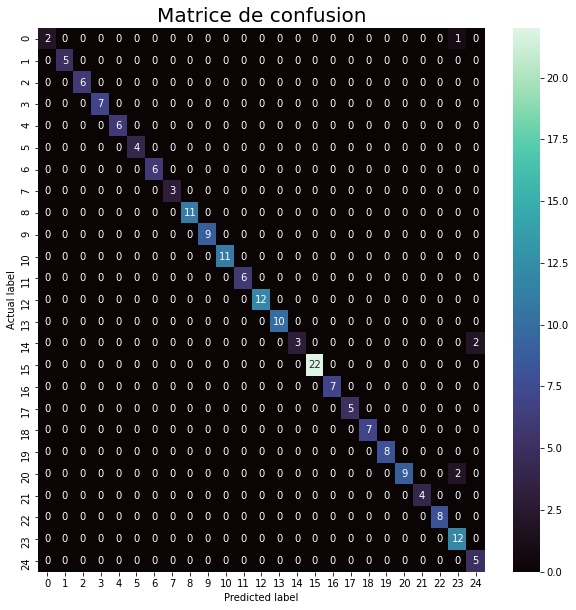

In [24]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [25]:
accuracy_score(y_test, predictions)

0.9740932642487047